# Prey predator model 

Equations: <br>
dx/dt = ayx - bx <br>
dy/dt = cy - dxy <br>
Where typically <br>
a = 3 * 10^(-5) <br>
b = 2 * 10^(-2) <br>
c = 3 * 10^(-2) <br>
d = 2 * 10^(-4) <br>
x and y are functions of t - time in years. <br>
x(t) - wolfs number in t. <br>
y(t) - rabbits number in t. <br>
x(0) = 100 <br>
y(0) = 1000 <br>


In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
plt.rcParams['figure.figsize'] = (20.0, 10.0)


In [2]:
tmax = 1000
t0 = 0
x0 = 100
y0 = 1000
a = 0.00003
b = 0.02
c = 0.03
d = 0.0002

x = list()
y = list()
x.append(x0)
y.append(y0)

for i in range(1, tmax):
    x.append( (x[i-1] + a * y[i-1] * x[i-1] - b * x[i-1]))
    y.append( (y[i-1] + c * y[i-1] - d * x[i-1] * y[i-1]))



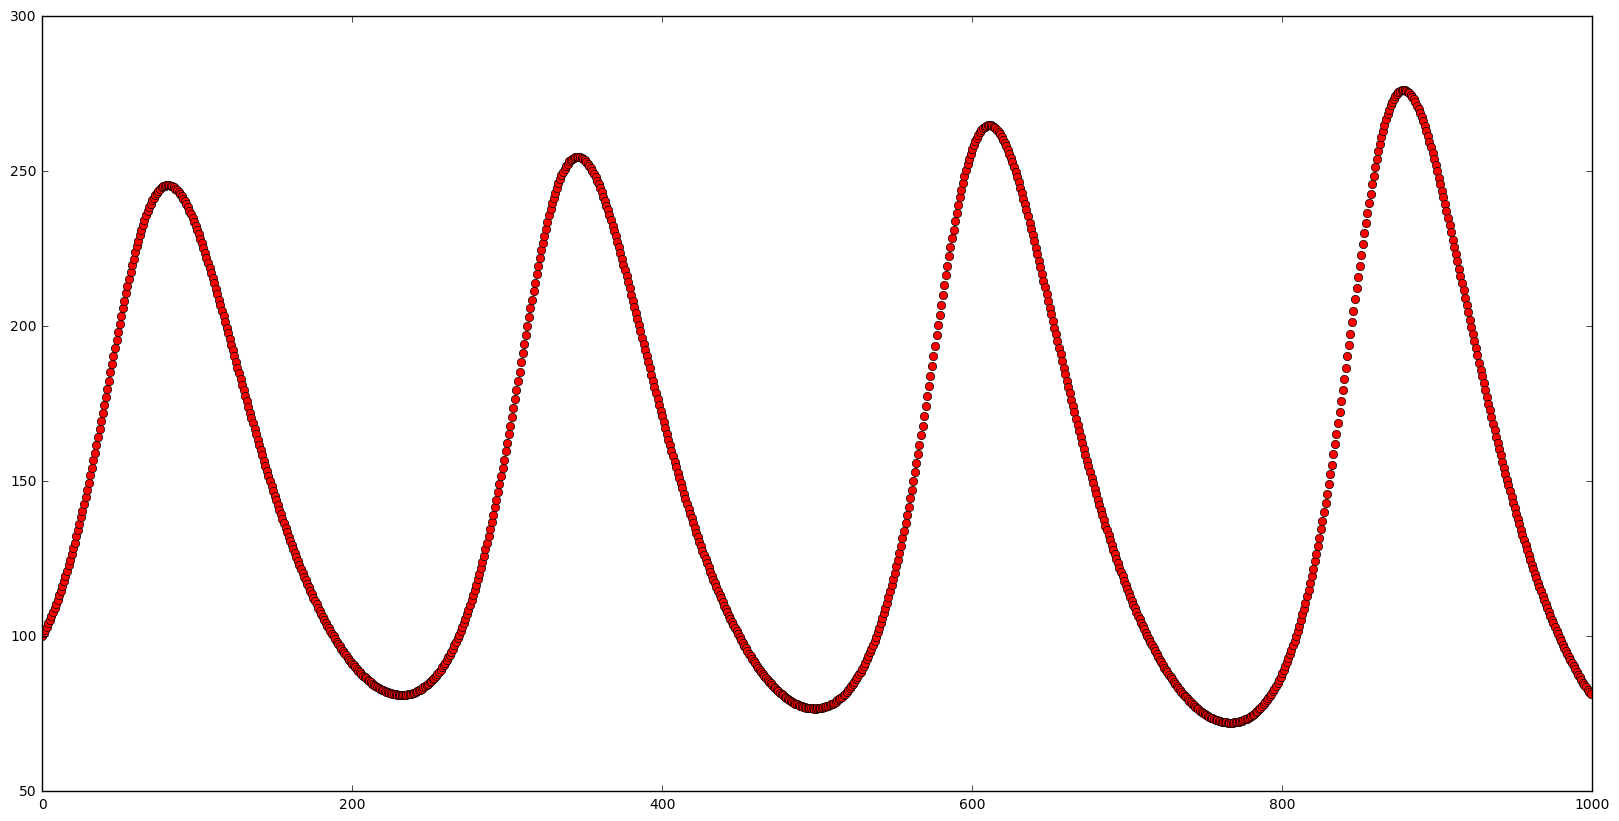

In [3]:
plt.plot(range(0, tmax), x, 'ro')
plt.show()

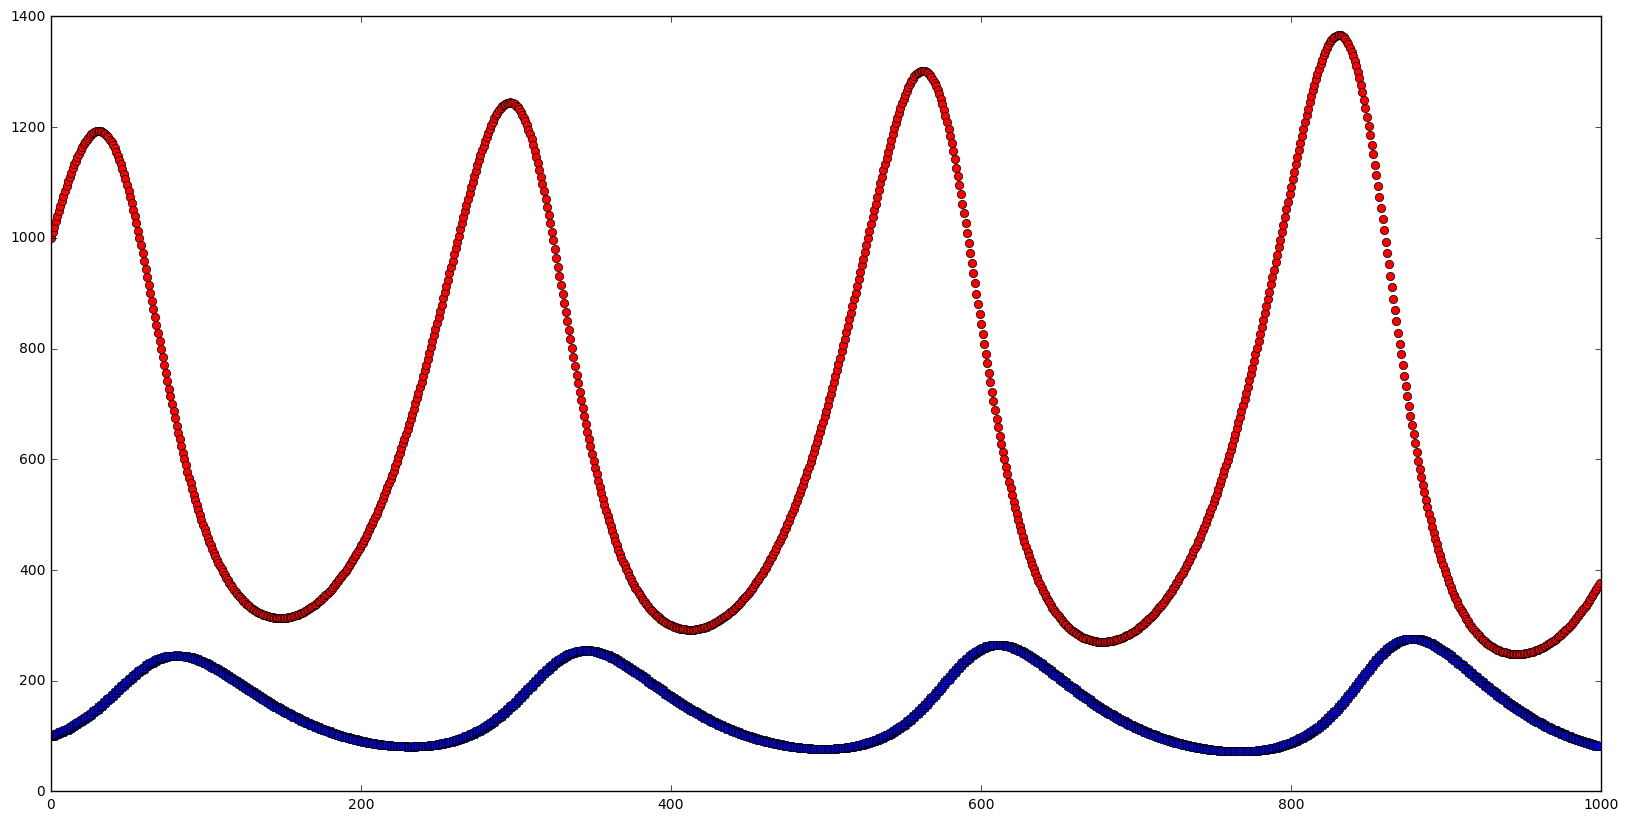

In [4]:
plt.plot(range(0, tmax), y, 'ro', range(0, tmax), x, 'bs')
plt.show()

At above graphs, we can see that number of rabbits (red points) and number of wolfs (blue points) is cyclic. It isn't exactly the same chart as in paper. It suggest, that there is some problem with parameters or rounding values. If we try round number of wolfs and rabbits it seems to work much better. 

# HANDY model 

The population is divided between two variables xc (Commoners) and xe (Elites). There are two rates β (birth rate - constant) and α (death rate - depends on wealth). Model assumes natural resources represented by y and accumulated wealth represented by w. 

$$
\begin{aligned}
\begin{cases}
\frac{\partial x_{C}}{\partial t}  = β_{C}x_{C} - α_{C}x_{C} \\
\frac{\partial x_{E}}{\partial t} = β_{E}x_{E} - α_{E}x_{E}\\
\frac{\partial y}{\partial t} = γy(λ−y) - δx_{C}y \\
\frac{\partial w}{\partial t} = δx_{C}y - C_{C} - C_{E} \\
\end{cases}
\end{aligned}
$$

$$
\begin{aligned}
\begin{cases}
C_{C} = min(1, \frac{w}{w_{th}})sx_{C} \\
C_{E} = min(1, \frac{w}{w_{th}})κsx_{E} \\
\end{cases}
\end{aligned}
$$

$$
\begin{aligned}
\begin{cases}
α_{C} = α_{m} + max(0, 1 - \frac{C_{C}}{sx_{C}})(α_{M} - α_{m}) \\
α_{E} = α_{m} + max(0, 1 - \frac{C_{E}}{sx_{E}})(α_{M} - α_{m}) \\
\end{cases}
\end{aligned}
$$

$$
\begin{aligned}
w_{th} = ρx_{C} + κρx_{E}
\end{aligned}
$$

$$
\begin{aligned}
Constants\ and\ their\ typical\ values \\
α_{m} \quad Normal\ (minimum)\ death\ rate \quad => \quad 0.01 \\
α_{M} \quad Famine\ (maximum)\ death\ rate \quad => \quad 0.07 \\
β_{C} \quad Commoner\ birth\ rate \quad => \quad 0.03 \\
β_{E} \quad Elite\ birth\ rate \quad => \quad 0.03 \\
s \quad Salary\ per\ capita \quad => \quad 0.0005 \\
ρ \quad Threshold\ wealth\ per\ capita \quad => \quad 0.005 \\
γ \quad Nature\ regeneration\ rate \quad => \quad 0.01 \\
λ \quad Nature\ carring\ capacity \quad => \quad 100 \\
κ \quad Inequality\ factor\quad => \quad 1, 10, 100 \\
δ \quad Depletion\ factor\quad => \quad None \\
\end{aligned}
$$

$$
\begin{aligned}
Variables\ and\ their\ initial\ values \\
x_{C} \quad Commoner\ population\quad => \quad 100 \\
x_{E} \quad Elite\ population\quad => \quad 0, 1, 25 \\
y \quad Nature\quad => \quad  λ\\
w \quad Accumulated\ wealth\quad => \quad 0 \\
\end{aligned}
$$

Using above equations and constants, we implemented function which returns simulation result.

In [72]:
class SimulationResult:
    def __init__(self, tmax, commoner_population_result, elite_population_result, nature_result, wealth_result):
        self.tmax = tmax
        self.commoner_population_result = commoner_population_result
        self.elite_population_result = elite_population_result
        self.nature_result = nature_result
        self.wealth_result = wealth_result
    
    def show_commoner_population(self):
        plt.yticks(np.arange(0, max(self.commoner_population_result), 100000))
        legend = mpatches.Patch(color='green', label='Commoner_population(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.commoner_population_result, 'go')
        plt.grid(True)
        plt.show()
        
    def show_elite_population(self):
        plt.yticks(np.arange(0, max(self.elite_population_result), 400))
        legend = mpatches.Patch(color='green', label='Elite_population(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.elite_population_result, 'go')
        plt.grid()
        plt.show()
        
    def show_nature(self):
        plt.yticks(np.arange(0, nature_carring_capacity, 1))
        legend = mpatches.Patch(color='green', label='Nature(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.nature_result, 'go')
        plt.grid()
        plt.show()
        
    def show_wealth(self):
        plt.yticks(np.arange(0, max(self.wealth_result), 100))
        legend = mpatches.Patch(color='green', label='Wealth(time)')
        plt.legend(handles=[legend])
        plt.plot(range(0, self.tmax), self.wealth_result, 'go')
        plt.grid()
        plt.show()
        
    def show_all(self):
        ran = np.arange(0, self.tmax)
        host = host_subplot(111, axes_class=AA.Axes)

        par1 = host.twinx()
        par2 = host.twinx()
        par3 = host.twinx()

        right_offset = 60
        left_offset = -60
        
        new_fixed_axis_2 = par2.get_grid_helper().new_fixed_axis
        par2.axis["left"] = new_fixed_axis_2(loc="left",
                                            axes=par2,
                                            offset=(left_offset, 0))
        new_fixed_axis_3 = par3.get_grid_helper().new_fixed_axis
        par3.axis["rigth"] = new_fixed_axis_3(loc="right",
                                            axes=par3,
                                           offset=(right_offset, 0))
        
        par2.axis["right"].toggle(all=False)
        par3.axis["right"].toggle(all=False)
        
        host.set_xlabel("Time [years]")
        host.set_ylabel("Commoners")
        par1.set_ylabel("Nature")
        par2.set_ylabel("Elite")
        par3.set_ylabel("Wealth")

        p1, = host.plot(ran, self.commoner_population_result, label="Commoners")
        p2, = par1.plot(ran, self.nature_result, label="Nature")
        p3, = par2.plot(ran, self.elite_population_result, label="Elite")
        p4, = par3.plot(ran, self.wealth_result, label="Wealth")
        
        host.legend()

        host.axis["left"].label.set_color(p1.get_color())
        par1.axis["right"].label.set_color(p2.get_color())
        par2.axis["left"].label.set_color(p3.get_color())
        par3.axis["right"].label.set_color(p4.get_color())
        
        par1.set_ybound(lower=0.0)
        par2.set_ybound(lower=0.0, upper=max(self.commoner_population_result))

        
        plt.draw()
        plt.show()
        

#constants
normal_death_rate = 0.01
famine_death_rate = 0.07
commoner_birth_rate = 0.03
elite_birth_rate = 0.03
salary_per_capita = 0.0005
threshold_wealth_per_capita = 0.005
nature_regeneration_rate = 0.01
nature_carring_capacity = 100
inequality_factor = [1, 10, 100]

#variables initial values
commoner_population_initial = 100
elite_population_initial = [0, 10, 25]
nature_initial = nature_carring_capacity
accumulated_wealth_initial = 0

#I have no idea how can I calculate this value, so I set something randomly.
elite_to_commoner_equilibrium_ratio = 0.6 


helper_parameter = (famine_death_rate - commoner_birth_rate) / (famine_death_rate - normal_death_rate)

def egalitarian_optimal_depletion_factor():
    return (2 *  helper_parameter * salary_per_capita)/ nature_carring_capacity

def equitable_optimal_depletion_factor(elite_scenario):
    helper = (1 + elite_population_initial[elite_scenario] / commoner_population_initial)
    return ((2 * helper_parameter * salary_per_capita)/ nature_carring_capacity) * helper
    
def unequal_optimal_depletion_factor(elite_scenario, equality_scenario):
    helper = (1 + inequality_factor[equality_scenario] * elite_to_commoner_equilibrium_ratio)
    return ((2 * helper_parameter * salary_per_capita)/ nature_carring_capacity) * helper

def depletion_factor(equality_scenario, elite_scenario, depletion_modifier):
    depletion_helper = 0
    if equality_scenario == 0:
        depletion_helper = egalitarian_optimal_depletion_factor()
    elif equality_scenario == 1:
        depletion_helper = equitable_optimal_depletion_factor(elite_scenario)
    else:
        equality_helper = unequal_optimal_depletion_factor(elite_scenario, equality_scenario)
    return depletion_helper * depletion_modifier

def wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario):
    commoner_helper = threshold_wealth_per_capita * actual_commoner_population
    elite_helper = inequality_factor[equality_scenario] * threshold_wealth_per_capita * actual_elite_population 
    return  commoner_helper + elite_helper 

def commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    wealth_threshold_helper = wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario)
    return min(1, actual_wealth / wealth_threshold_helper) * salary_per_capita * actual_commoner_population

def elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    wealth_threshold_helper = wealth_threshold(actual_commoner_population, actual_elite_population, equality_scenario)
    helper = inequality_factor[equality_scenario] * salary_per_capita * actual_elite_population
    return min(1, actual_wealth / wealth_threshold_helper) * helper

def commoner_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    commoners_consumption_rate_helper = commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    helper = max(0, 1 - commoners_consumption_rate_helper / (salary_per_capita * actual_commoner_population))
    return normal_death_rate + helper * (famine_death_rate - normal_death_rate)
     
def elite_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    elite_consumption_rate_helper = elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    helper = 0
    if actual_elite_population != 0:
        helper = max(0, 1 - elite_consumption_rate_helper / (salary_per_capita * actual_elite_population))
    return normal_death_rate + helper * (famine_death_rate - normal_death_rate)

#Derivative definitions
def commoner_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    commoner_death_rate_helper = commoner_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return commoner_birth_rate * actual_commoner_population - commoner_death_rate_helper * actual_commoner_population;

def elite_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario):
    elite_death_rate_helper = elite_death_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return elite_birth_rate * actual_elite_population - elite_death_rate_helper * actual_elite_population;

def nature(actual_nature, actual_commoner_population, elite_scenario, equality_scenario, depletion_modifier):
    regeneration_helper = nature_regeneration_rate * actual_nature * (nature_carring_capacity - actual_nature)
    return regeneration_helper - depletion_factor(equality_scenario, elite_scenario, depletion_modifier) * actual_commoner_population * actual_nature

def wealth(actual_wealth, actual_commoner_population, actual_elite_population, actual_nature, elite_scenario, equality_scenario, depletion_modifier):
    depletion_factor_helper = depletion_factor(equality_scenario, elite_scenario, depletion_modifier)
    commoners_consumption_rate_helper = commoners_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    elite_consumption_rate_helper = elite_consumption_rate(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
    return depletion_factor_helper * actual_commoner_population * actual_nature - commoners_consumption_rate_helper - elite_consumption_rate_helper

def resultChecker(i):
    return max(0, i)
        

def simulate(elite_scenario, equality_scenario, tmax, depletion_modifier):
    #preparing simulation

    commoner_population_result = list()
    elite_population_result = list()
    nature_result = list()
    wealth_result = list()

    commoner_population_result.append(commoner_population_initial)
    elite_population_result.append(elite_population_initial[elite_scenario])
    nature_result.append(nature_initial)
    wealth_result.append(accumulated_wealth_initial)

    #simulation loop
    for i in range(1, tmax):
        actual_commoner_population = commoner_population_result[i-1]
        actual_elite_population = elite_population_result[i-1]
        actual_nature = nature_result[i-1]
        actual_wealth = wealth_result[i-1]

        commoner_population_helper = commoner_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
        elite_population_helper = elite_population(actual_wealth, actual_commoner_population, actual_elite_population, equality_scenario)
        nature_helper = nature(actual_nature, actual_commoner_population, elite_scenario, equality_scenario, depletion_modifier)
        wealth_helper = wealth(actual_wealth, actual_commoner_population, actual_elite_population, actual_nature, elite_scenario, equality_scenario, depletion_modifier)

        commoner_population_result.append(resultChecker(actual_commoner_population + commoner_population_helper))
        elite_population_result.append(resultChecker(actual_elite_population + elite_population_helper))
        nature_result.append(resultChecker(actual_nature + nature_helper))
        wealth_result.append(resultChecker(actual_wealth + wealth_helper))
        

    #show results
    result = SimulationResult(tmax, commoner_population_result, elite_population_result, nature_result, wealth_result)
    result.show_all()


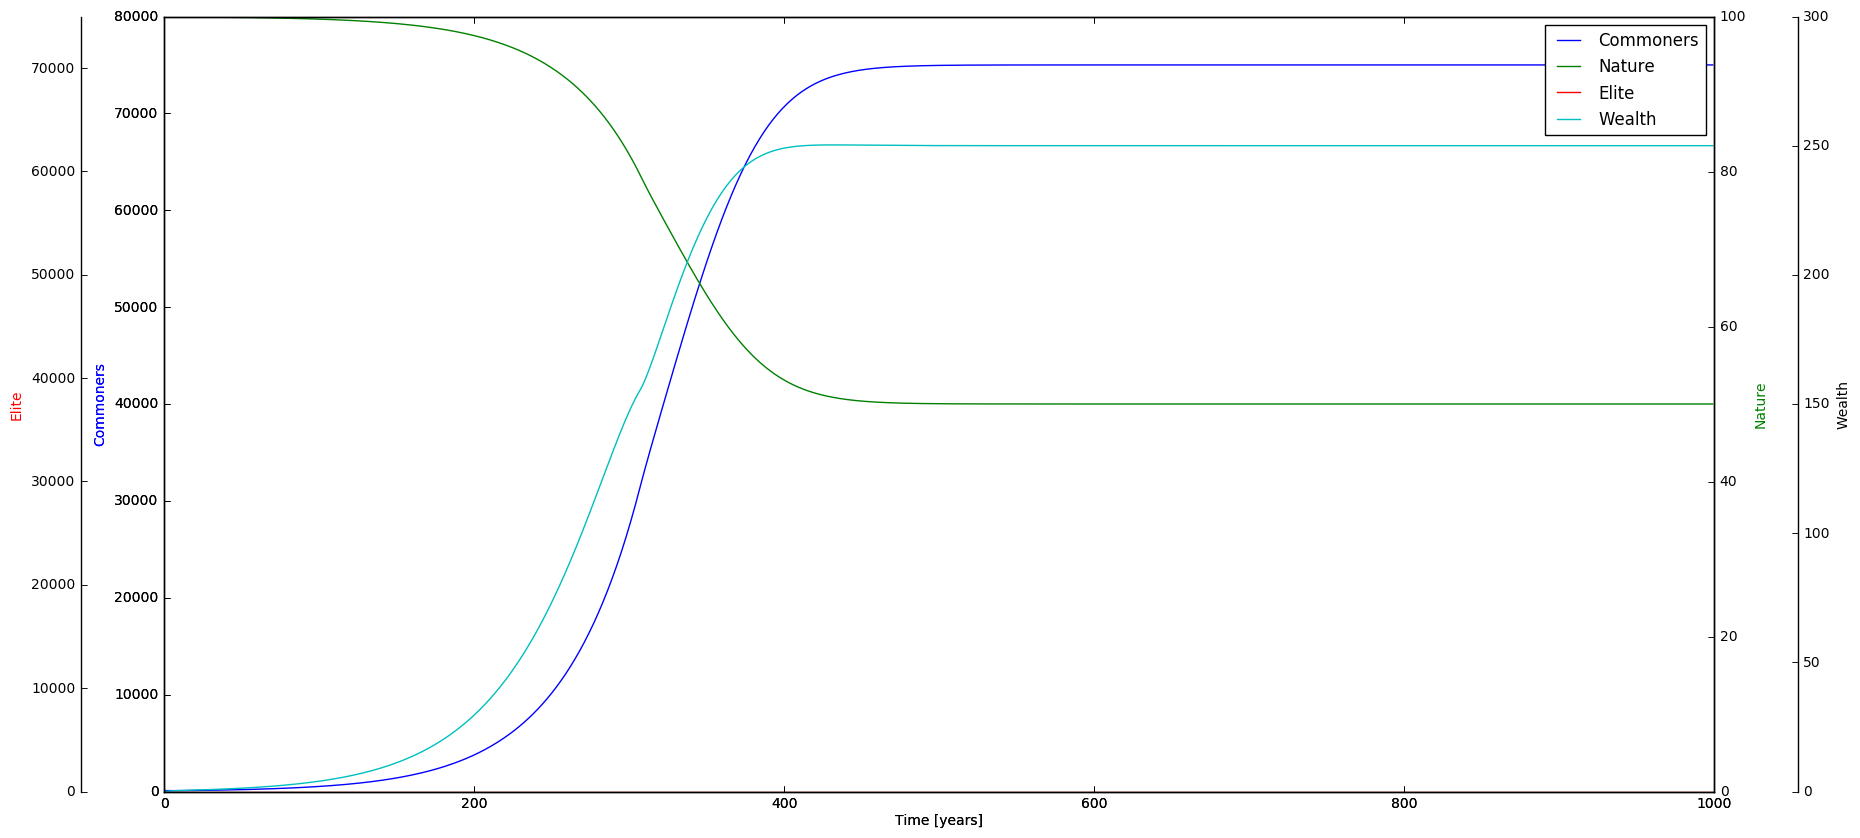

In [73]:
simulate(elite_scenario = 0, equality_scenario = 0, tmax = 1000, depletion_modifier = 1)

Powyższe wykresy przedstawiają zależności kolejnych symulowanych zmiennych w kolejnych latach. Jest to symulacja pierwsza, w której zakłada się brak występowania elit, a także współczynnik nierówności (inequality_factor) równy 0. Nie modyfikujemy także współczynika zmniejszenia (depletion_modifier), który jest równy 1. Możemy łatwo zaobserwować, że model z takimi parametrami dość szybko i łagodnie się stabilizuje.

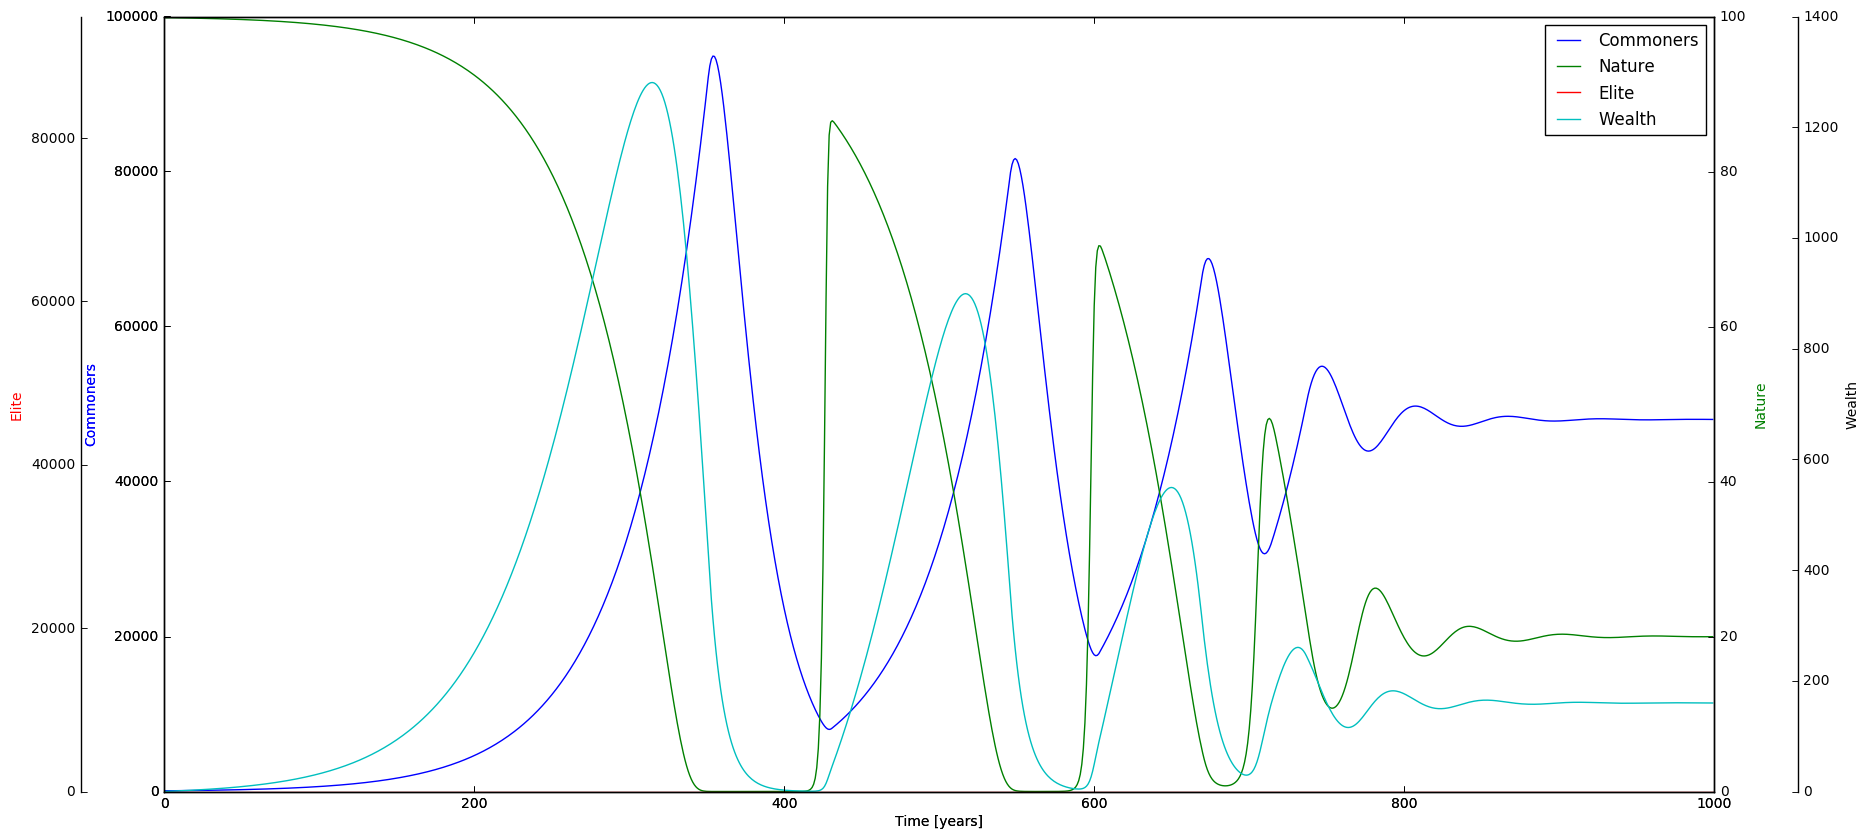

In [74]:
simulate(elite_scenario = 0, equality_scenario = 0, tmax = 1000, depletion_modifier = 2.5)

Dokonując zmiany współczynnika zmniejszenia (depletion_factor) możemy zaobserwować, że układ potrzebuje dużo więcej czasu by się ustabilizować, a także zasoby naturalne i bogactwo ustabilizowuje się na dużo niższym poziomie niż w poprzednim przypadku. 

Obydwie symulacje, w których elity nie istnieją możemy uznać za zgodne z przewidywaniami.

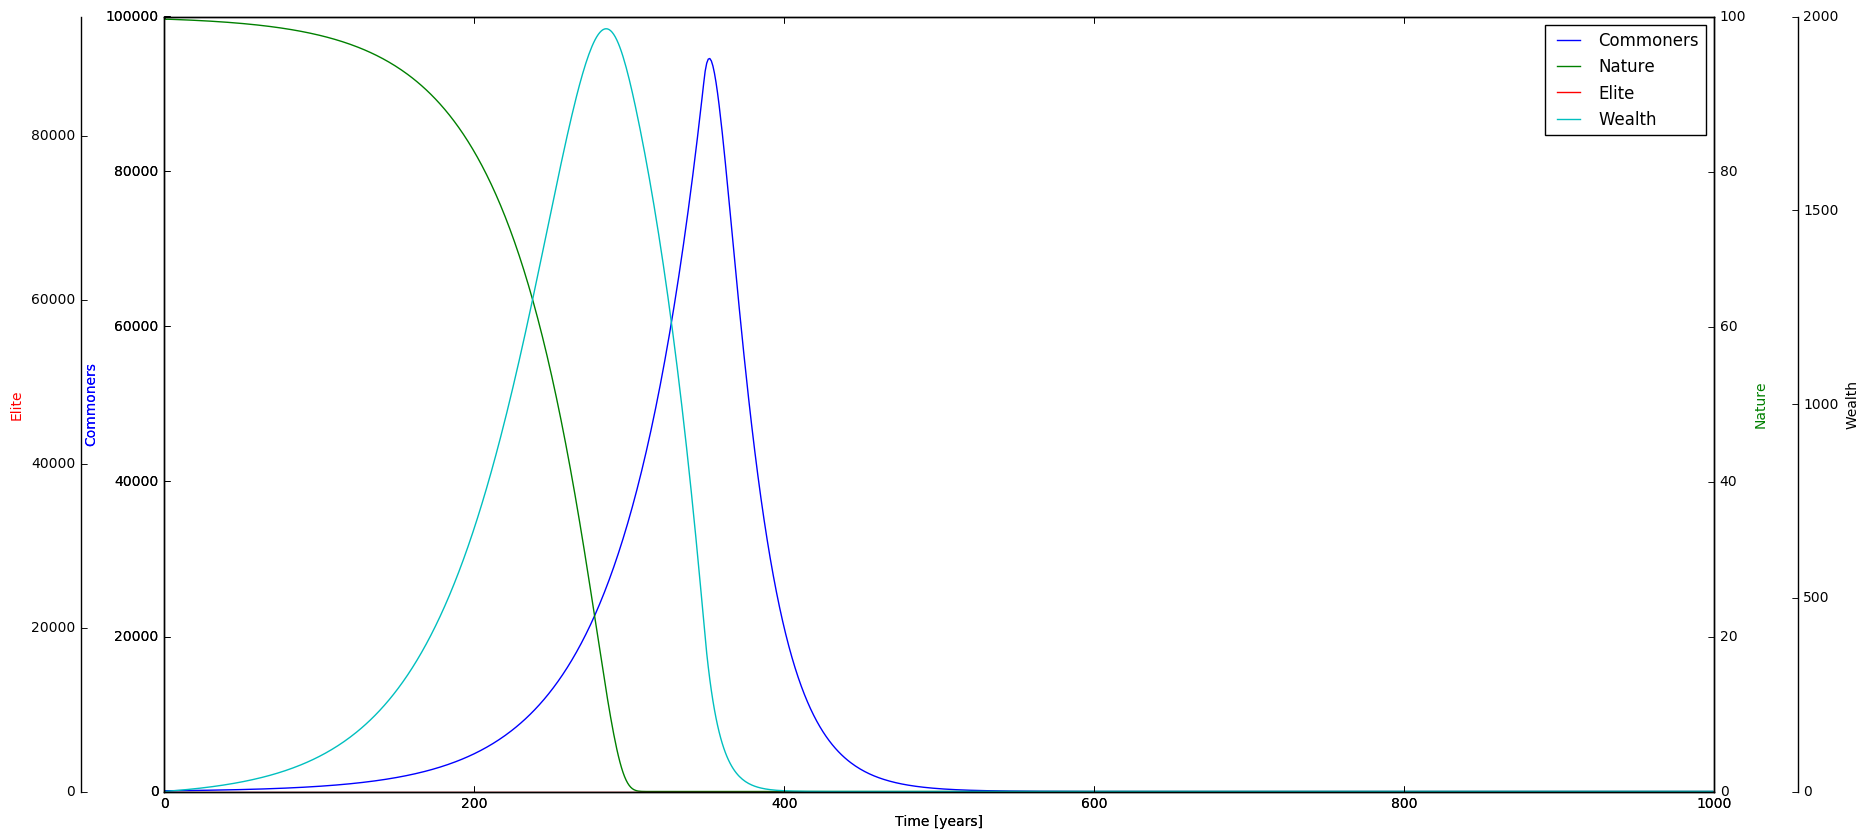

In [75]:
simulate(elite_scenario = 0, equality_scenario = 0, tmax = 1000, depletion_modifier = 5.5)

Powyższy przypadek z współczynnikiem zmiejszania ustawionym aż na 5.5 pokazuje, że gdy współczynnik przekroczy pewną wartość, to układ stabilizuje się natomiast wszystkie mierzone wartości sięgają 0. Jest to zgodne z wynikami przedstawianymi w paperze.

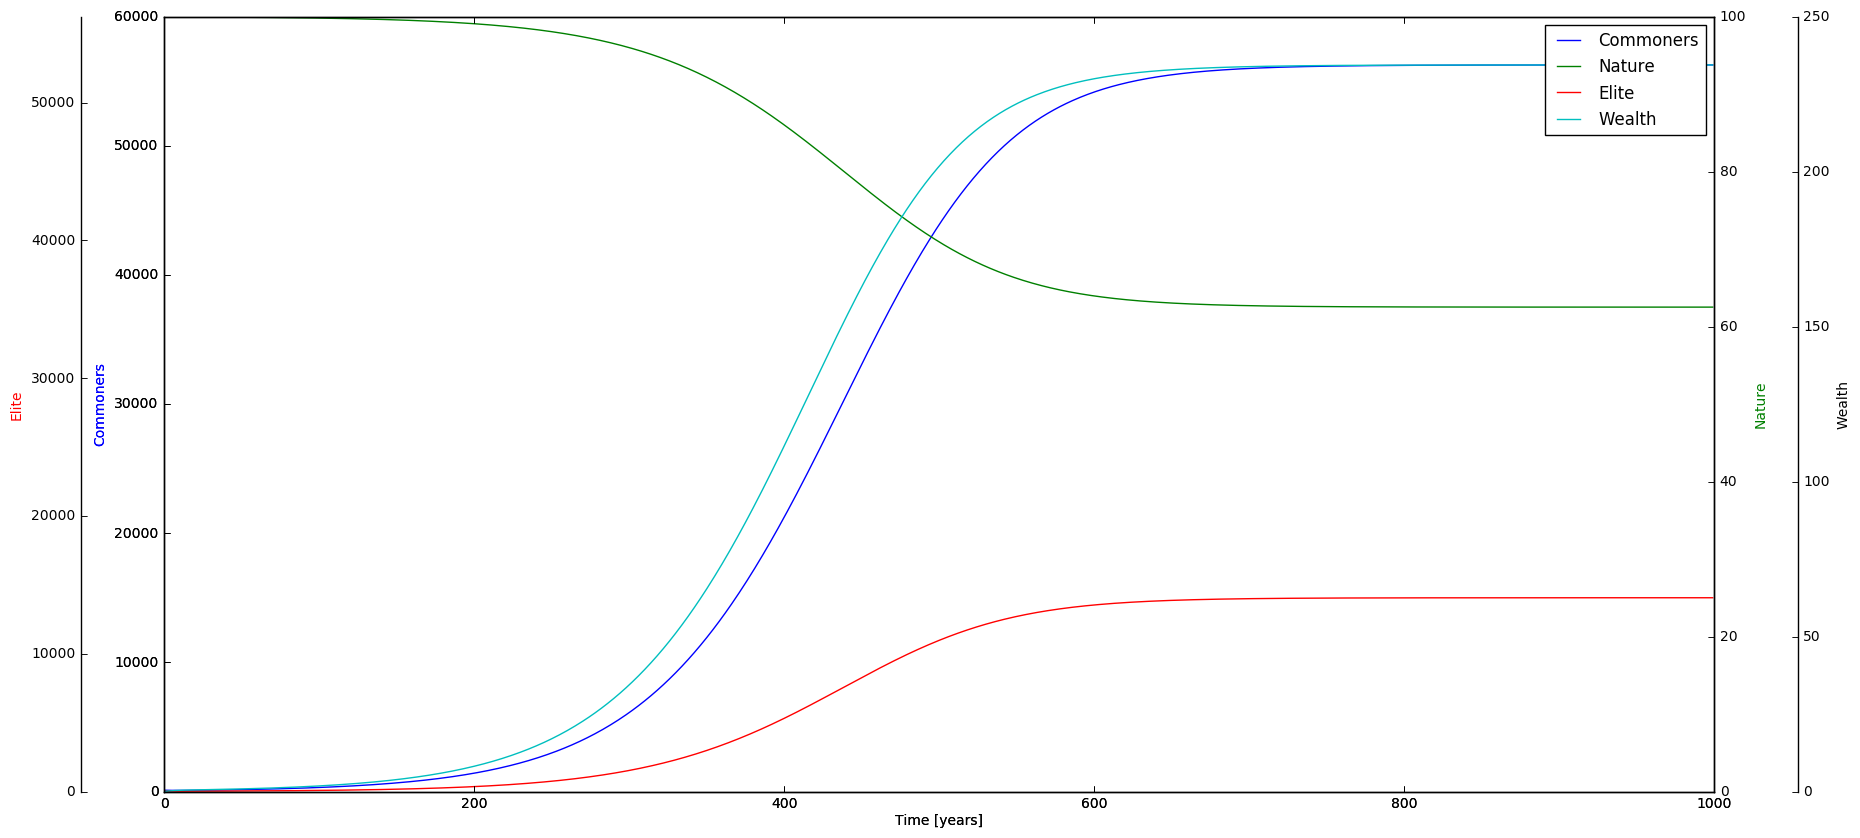

In [76]:
simulate(elite_scenario = 2, equality_scenario = 0, tmax = 1000, depletion_modifier = 1)

Powyższe wykresy przedstawiają sytuację, w której początkową liczbę elit ustawiamy na 10, jednak współczynnik nierówności zostawiamy na 1. Dzięki temu tak naprawdę otrzymujemy sytuację, w której mamy pracowników i osoby niepracujące, których jednak nie nazywamy elitami, gdyż ich współczynnik konsumpcji jest taki sam jak pracowników. Wykresy również pokrywają się z paparem, a cały układ stabilizuje się na pewnym poziomie po kilkuset iteracjach

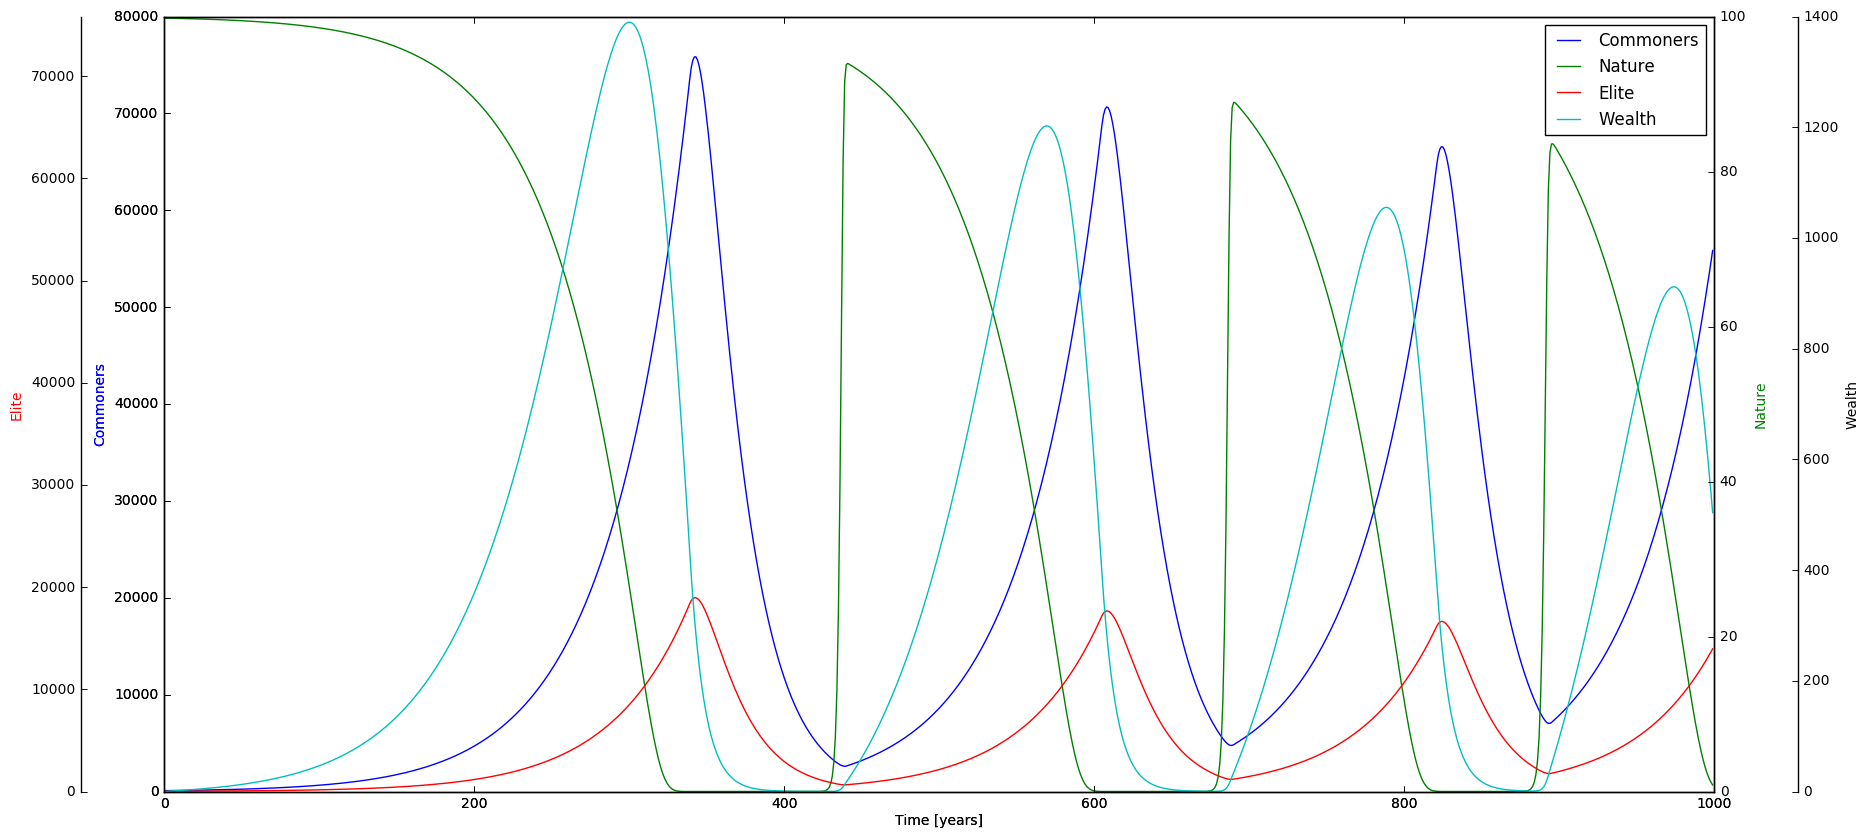

In [77]:
simulate(elite_scenario = 2, equality_scenario = 0, tmax = 1000, depletion_modifier = 3.46)

Powyżej symulacja z współczynnikiem ustawionym na 3.46, widzimy, że układ nie potrafi się ustabilizować, wartości maleją. Wyniki zgodne z tymi z publikacji.

# Wnioski i podsumowanie:

Model HANDY jest ciekawym i wymagającym dodatkowych badań rozszerzeniem modelu prey-predator. Naszym zdaniem publikacja, na której opieraliśmy nasz eksperyment dobrze opisuje model, jednak mamy kilka zastrzeżeń do ostatniego rozpatrywanego przypadku (nierówne społeczeństwo i duża liczba elit), gdyż pojawia się tam współczynnik elite_to_commoner_equilibrium_ratio, który autorzy definiują, że zależy od wyników eksperymentu. Być może jest to nasze niezrozumienie lub błąd, jednak nie udało nam się odtworzyć trzeciego przypadku. Dwa, które odtworzyliśmy i przeanalizowaliśmy powyżej zgadzają się z przewidywaniami i zachęcają do dalszych badań. Powyższa implementacja jest dobrze zamodelowana, więc bardzo zachęcamy do modyfikowania parametrów i przeprowadzania własnych symulacji. W przypadku znalezienia błędów lub chęci wyrażenia uwag zapraszamy do kontaktu: passarinho4@gmail.com

Całość bazuje na publikacji dostępnej pod adresem http://www.sciencedirect.com/science/article/pii/S0921800914000615 <br>
Kody źródłowe dostępne są pod adresem https://github.com/Passarinho4/isz-handy

